In [1]:
import pandas as pd
data=pd.read_csv('housing.csv')

In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [9]:
data.shape

(489, 4)

In [11]:
print("Checking Missing Values:")
print(data.isnull().sum())

Checking Missing Values:
RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


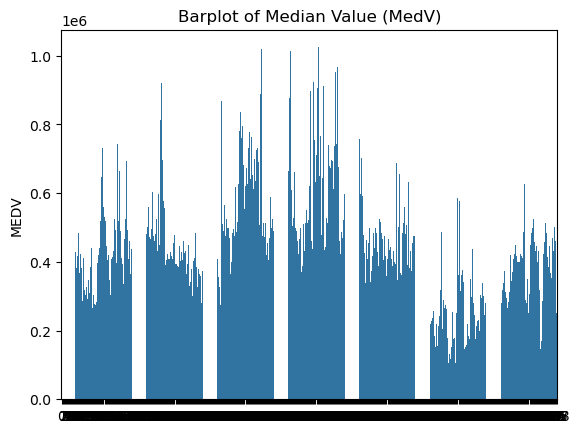

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data['MEDV'])
plt.title("Barplot of Median Value (MedV)")
plt.show()

In [21]:
features = data.drop(columns=['MEDV'])
target = data['MEDV']

# Min-Max Normalization
X = (features - features.min()) / (features.max() - features.min())
y = target 

print(X.head())

         RM     LSTAT   PTRATIO
0  0.623114  0.083356  0.287234
1  0.591276  0.198944  0.553191
2  0.749225  0.056960  0.553191
3  0.710564  0.026674  0.648936
4  0.741369  0.093081  0.648936


In [25]:
import numpy as np
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)
            
            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Linear Regression Model
lr_model = LinearRegression(learning_rate=0.01, epochs=2000)
lr_model.fit(X, y)
y_pred_lr = lr_model.predict(X)


In [27]:
from collections import Counter

#A simple version of Random Forest using decision trees.
class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(set(y)) == 1:
            return Counter(y).most_common(1)[0][0]

        best_feature, best_split = self.best_split(X, y)
        left_indices = X[:, best_feature] < best_split
        right_indices = ~left_indices

        return {
            "feature": best_feature,
            "split": best_split,
            "left": self.build_tree(X[left_indices], y[left_indices], depth + 1),
            "right": self.build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def best_split(self, X, y):
        # Simple mean split for demonstration
        best_feature = np.random.randint(0, X.shape[1])
        best_split = np.mean(X[:, best_feature])
        return best_feature, best_split

    def predict_one(self, x, tree):
        if isinstance(tree, dict):
            if x[tree["feature"]] < tree["split"]:
                return self.predict_one(x, tree["left"])
            else:
                return self.predict_one(x, tree["right"])
        return tree

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

# Train Decision Tree
dt_model = DecisionTree(max_depth=5)
dt_model.fit(X.to_numpy(), y.to_numpy())
y_pred_dt = dt_model.predict(X.to_numpy())


In [29]:
class XGBoostScratch:
    def __init__(self, n_estimators=50, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        residuals = y.copy()
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=3)
            tree.fit(X, residuals)
            self.trees.append(tree)
            residuals -= self.learning_rate * tree.predict(X)

    def predict(self, X):
        pred = np.zeros(len(X))
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        return pred

# Train XGBoost
xgb_model = XGBoostScratch(n_estimators=50, learning_rate=0.1)
xgb_model.fit(X.to_numpy(), y.to_numpy())
y_pred_xgb = xgb_model.predict(X.to_numpy())


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

evaluate(y, y_pred_lr, "Linear Regression")
evaluate(y, y_pred_dt, "Decision Tree")
evaluate(y, y_pred_xgb, "XGBoost")

Linear Regression - RMSE: 101039.0179, R²: 0.6258
Decision Tree - RMSE: 112960.9941, R²: 0.5323
XGBoost - RMSE: 94448.2780, R²: 0.6730


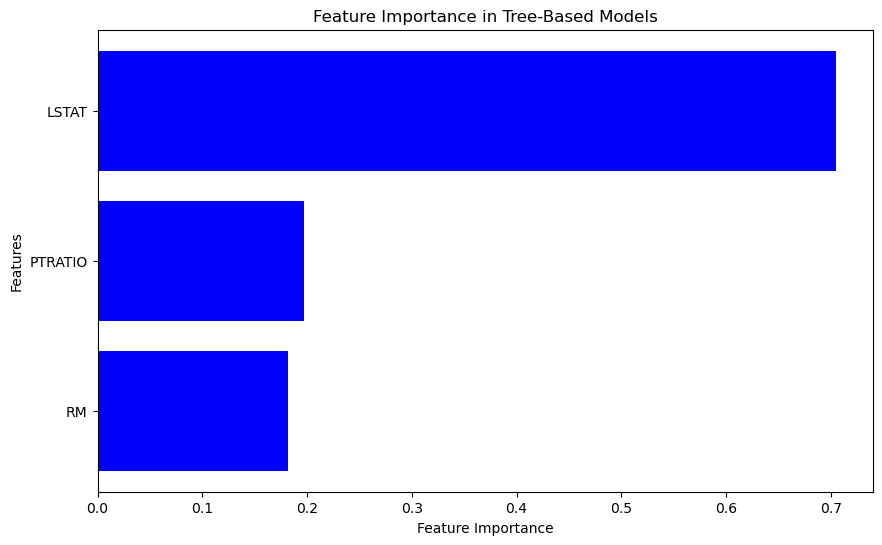

In [37]:
feature_importance = np.random.rand(len(X.columns)) 
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10,6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Tree-Based Models")
plt.show()
